<a href="https://colab.research.google.com/github/ilaydakasapcopur/SeniorProject/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install albumentations
!pip install torch torchvision datasets matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from PIL import Image
import numpy as np
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
import os

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/346 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/832k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20 [00:00<?, ? examples/s]

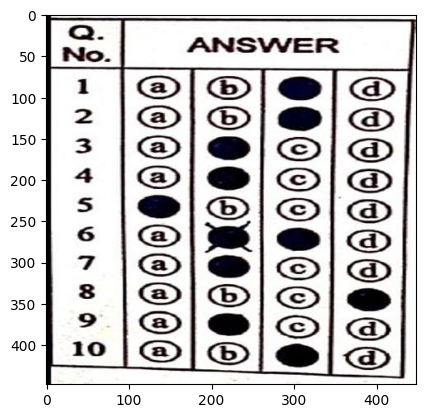

In [3]:
dataset = load_dataset("roydev99/OMR")

train_data = dataset["train"]

image = train_data[0]['image']
label= None
plt.imshow(np.array(image))
plt.show()

In [4]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((256, 256), scale=(0.8, 1.0)),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),                           # Flip with default p=0.5
    transforms.RandomApply([                                     # Apply rotation conditionally
        transforms.RandomRotation(degrees=15)
    ], p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2,
                           saturation=0.2, hue=0.1),             # Augment lighting conditions
    transforms.ToTensor(),                                       # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])              # Normalize
])


In [5]:
class HuggingFaceDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):

        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample["image"]
        label = 0

        if self.transform:
            image = self.transform(image)

        return image, label

In [6]:
# Create PyTorch Dataset Wrappers
train_dataset = HuggingFaceDataset(train_data, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [9]:
def visualize_images(dataloader, num_images=5):
    images, labels = next(iter(dataloader))
    for i in range(min(num_images, len(images))):
        image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to image
        image = (image * 0.229 + 0.485).clip(0, 1)  # Unnormalize for visualization
        plt.imshow(image)
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
        plt.show()


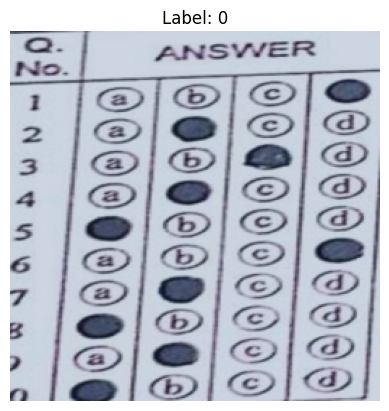

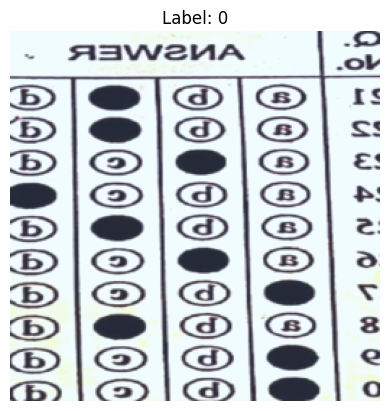

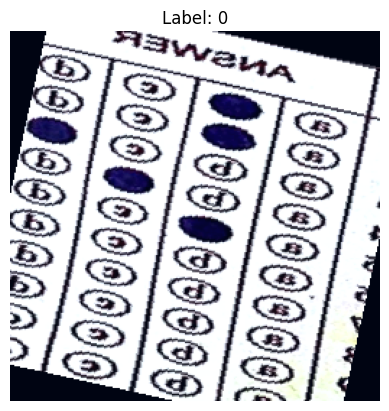

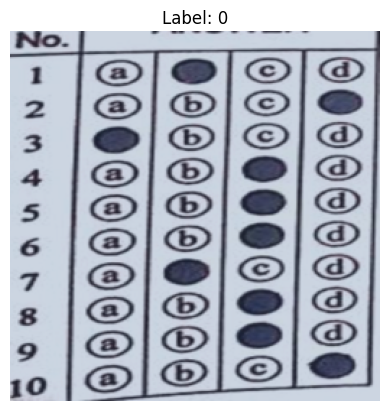

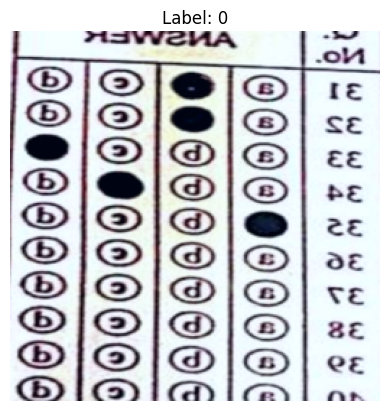

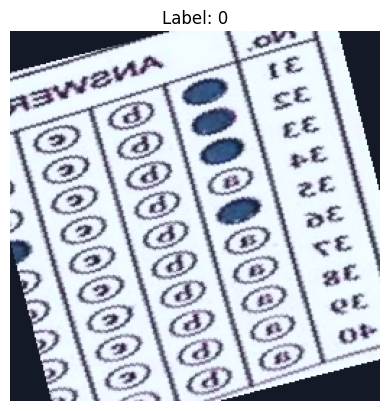

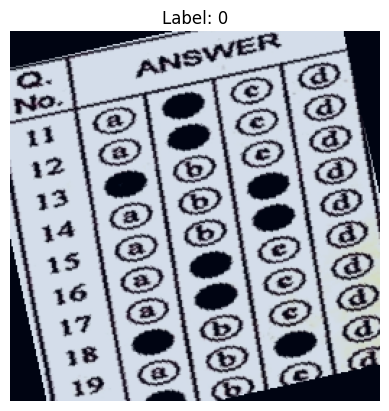

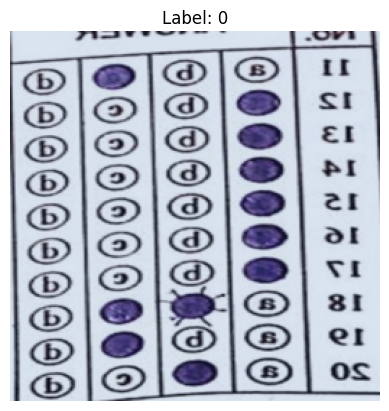

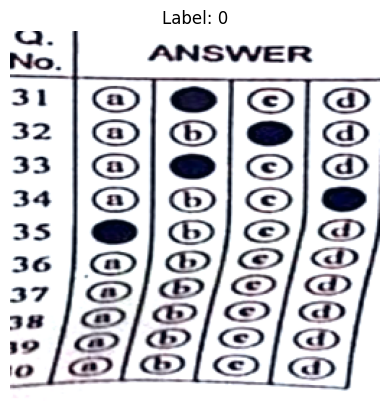

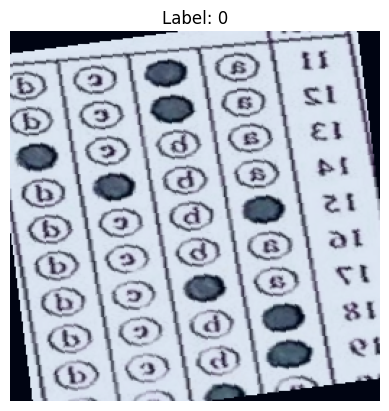

In [11]:
visualize_images(train_loader, num_images=10)